In [1]:
import glob
import numpy as np
import matplotlib.pyplot as plt

import csv
import os
import re

In [2]:
%matplotlib inline

In [3]:
def read_to_dict(file_name):
    res_dict = {}
    keym = {}
    with open(file_name, newline='') as csvfile:
        csv_reader = csv.reader(csvfile, delimiter=',')
        for i, row in enumerate(csv_reader):
            if i == 0:
                for j, rr in enumerate(row):
                    res_dict[rr] = []
                    keym[j] = rr
            else:
                for j, rr in enumerate(row):
                    if j not in keym:
                        print('error')
                        break
                    res_dict[keym[j]].append(float(rr))
    return res_dict

In [4]:
def early_stop(result_dict, key1, key2, max_ep):
    if max_ep is None:
        best_ep_0 = np.argmax(np.array(result_dict[key1]))
        best_ep_1 = np.argmax(np.array(result_dict[key2]))
    else:
        best_ep_0 = np.argmax(np.array(result_dict[key1][0:max_ep]))
        best_ep_1 = np.argmax(np.array(result_dict[key2][0:max_ep]))
    return best_ep_0, 9#best_ep_1

In [5]:
def collect_results(entries, res_keys, which, max_ep):
    map_k = {0:"test", 1:"val", 2:"id_test", 3: "train"}
    res = {}
    for i in range(2):
        res[i] = {"test":{}, "val":{}, "id_test":{}, "train":{}}
        for dic in ["test", "val", "id_test", "train"]:
            for res_k in res_keys:
                res[i][dic][res_k] = []
    for entry in entries:
        e1,e2 = early_stop(entries[entry][which],res_keys[0], res_keys[1], max_ep)
        for i, e_v in enumerate([e1, e2]):
            for res_k in res_keys:
                for j_id in range(4):
                    if entries[entry][j_id] is None:
                        continue
                    if e_v >= len(entries[entry][j_id][res_k]):
                        print("Error", res_k, len(entries[entry][j_id][res_k]), map_k[j_id])
                        res[i][map_k[j_id]][res_k].append(entries[entry][j_id][res_k][-1])
                    else:
                        res[i][map_k[j_id]][res_k].append(entries[entry][j_id][res_k][e_v])

    return res
def print_row(row, res_keys):
    final_str = ""
    for res_k in res_keys:
        final_str += " {:04.2f}".format(100*np.mean(row[res_k]))
        final_str += " {:04.2f}".format(100*np.std(row[res_k]))
    return final_str

In [6]:
def parse_config(log_di, my_keys):
    config = open(log_di+'log.txt').read().split('\n')
    dat_conf = {}
    for ll in config:
        if 'Epoch [0]' in ll:
            break
        if 'Dataset kwargs' in ll and '{}' not in ll:
            dat_conf[ll.split(':')[0]] = ll.split(':')[2]
        elif ll.split(':')[0] in my_keys:
            dat_conf[ll.split(':')[0]] = ll.split(':')[1]
    return dat_conf

def parse_config_orig(log_di, my_keys):
    config = open(log_di+'log.txt').read().split('\n')
    dat_conf = {}
    for ll in config:
        if 'Epoch [0]' in ll:
            break
        if ll.split(':')[0] in my_keys:
            dat_conf[ll.split(':')[0]] = ll.split(':')[1]
    return dat_conf

In [7]:
log_dicts = sorted(glob.glob('./new_logs_ab*/'), key= lambda x:int(x.split('_')[-1].split('/')[0]))

In [8]:
my_keys = ['Dataset', 'Algorithm', 'Uniform over groups', 'Distinct groups', 'N groups per batch']
my_keys += ['Batch size', 'Rd type', 'Warm start epoch', 'Control only direction', 'Only inconsistent']
my_keys += ['Without sampling', 'Lr', 'Weight decay', 'Seed']

exps = {}
for log_di in log_dicts:
    dat_conf = parse_config_orig(log_di, my_keys)
    if not dat_conf['Dataset'] == ' iwildcam':
        continue
    exp_name = "{}_{}_{}".format(dat_conf['Warm start epoch'], dat_conf['Rd type'], dat_conf['Lr'])
    if exp_name not in exps:
        exps[exp_name] = {}
    exps[exp_name][dat_conf['Seed']] = (read_to_dict(log_di+'test_eval.csv'), 
                                        read_to_dict(log_di+'val_eval.csv'), 
                                        read_to_dict(log_di+'id_test_eval.csv'),
                                        read_to_dict(log_di+'train_eval.csv'))
    print(log_di, exp_name)

./new_logs_ablation_0/  -1_ 0_ 3e-05
./new_logs_ablation_1/  -1_ 0_ 3e-05
./new_logs_ablation_2/  -1_ 0_ 3e-05
./new_logs_ablation_3/  -1_ 1_ 3e-05
./new_logs_ablation_4/  -1_ 1_ 3e-05
./new_logs_ablation_5/  -1_ 1_ 3e-05
./new_logs_ablation_6/  -1_ 2_ 3e-05
./new_logs_ablation_7/  -1_ 2_ 3e-05
./new_logs_ablation_8/  -1_ 2_ 3e-05
./new_logs_ablation_9/  -1_ 3_ 3e-05
./new_logs_ablation_10/  -1_ 3_ 3e-05
./new_logs_ablation_11/  -1_ 3_ 3e-05
./new_logs_ablation_12/  -1_ 4_ 3e-05
./new_logs_ablation_13/  -1_ 4_ 3e-05
./new_logs_ablation_14/  -1_ 4_ 3e-05
./new_logs_ablation_15/  -1_ 5_ 3e-05
./new_logs_ablation_16/  -1_ 5_ 3e-05
./new_logs_ablation_17/  -1_ 5_ 3e-05
./new_logs_ablation_18/  2_ 0_ 3e-05
./new_logs_ablation_19/  2_ 0_ 3e-05
./new_logs_ablation_20/  2_ 0_ 3e-05
./new_logs_ablation_21/  2_ 1_ 3e-05
./new_logs_ablation_22/  2_ 1_ 3e-05
./new_logs_ablation_23/  2_ 1_ 3e-05
./new_logs_ablation_24/  2_ 2_ 3e-05
./new_logs_ablation_25/  2_ 2_ 3e-05
./new_logs_ablation_26/  2_ 2_

In [12]:
for exp_id in exps:
    if '3e-05' not in exp_id:
        continue
    #if '2_' not in exp_id or '-1_ ' in exp_id:
    #    continue
    resO = collect_results(exps[exp_id], ('acc_avg', 'F1-macro_all'),1 , None)
    print(exp_id)

    for alg in resO:
        #res_test_str = "ES_{} ".format(alg) +print_row(resO[alg]['test'], ('acc_avg', 'F1-macro_all'))
        #res_id_t_str = "ES_{} ".format(alg) +print_row(resO[alg]['id_test'], ('acc_avg', 'F1-macro_all'))
        #res_train_str = "ES_{} ".format(alg) +print_row(resO[alg]['train'], ('acc_avg', 'F1-macro_all'))
        A = np.abs(np.array(resO[alg]['test']['acc_avg']) - np.array(resO[alg]['id_test']['acc_avg']))
        print("Te\t", np.mean(A), np.std(A)  )
        print(np.mean(resO[alg]['id_test']['acc_avg']))
        print(np.mean(resO[alg]['test']['acc_avg']))
        print(np.mean(resO[alg]['id_test']['acc_avg']) - np.mean(resO[alg]['test']['acc_avg']))
        #print("ID \t", res_id_t_str)
        #print("Tr \t", res_train_str)

 -1_ 0_ 3e-05
Te	 0.03300138314565023 0.021559831678537995
0.7335458993911743
0.700544516245524
0.033001383145650265
Te	 0.032714903354644775 0.02089691431447121
0.7388602693875631
0.7061453660329183
0.032714903354644775
 -1_ 1_ 3e-05
Te	 0.029089152812957764 0.025002675977335204
0.7140462597211202
0.6849571069081625
0.029089152812957764
Te	 0.04732125997543335 0.010793568426243629
0.7233668565750122
0.6760455965995789
0.04732125997543335
 -1_ 2_ 3e-05
Te	 0.022402524948120117 0.011542196683491582
0.7182568709055582
0.7074073155721029
0.01084955533345533
Te	 0.031235615412394207 0.01234607061316756
0.6869430144627889
0.6881041924158732
-0.0011611779530842359
 -1_ 3_ 3e-05
Te	 0.042725165685017906 0.01219150067726539
0.7402910590171814
0.7246617277463278
0.01562933127085364
Te	 0.020977636178334553 0.003912323237987352
0.7197694381078085
0.6987918019294739
0.02097763617833459
 -1_ 4_ 3e-05
Te	 0.04720093806584676 0.02114740373193361
0.6891096433003744
0.6550832390785217
0.03402640422185

In [64]:
XEr = [0.4873271663983663, 0.6282318035761515, 0.7397694381078085, 0.77605616736412048, 0.7800920517285665, 0.7817921241124471]
GenE = [0.00619562466939283, 0.008344709873199463, 0.00907487473487854, 0.0107487473487854, 0.04086331526438395, 0.08612317840258281]
GenSTD = [0.003912323237987352, 0.01234607061316756, 0.011542196683491582, 0.010793568426243629, 0.025002675977335204, 0.021559831678537995]

In [65]:
np.array(NXer) - np.array(GenE)

array([0.43113154, 0.61988709, 0.73069456, 0.76530742, 0.7390572 ,
       0.69566895])

In [66]:
#XEr = [0.5116098423798879, 0.6858801444371542, 0.7340718110402426, 0.7667811314264933, 0.7777921241124471, 0.78474874734]
#GenE = [0.011651110251744588, 0.013665298620859781, 0.0197487473487854, 0.030889312426249187, 0.04086331526438395, 0.08612317840258281]
#GenSTD = [0.010541317565693284, 0.004864948126780324, 0.018260127957685966, 0.02789840280635204, 0.016464591994962217, 0.027581544749164046]

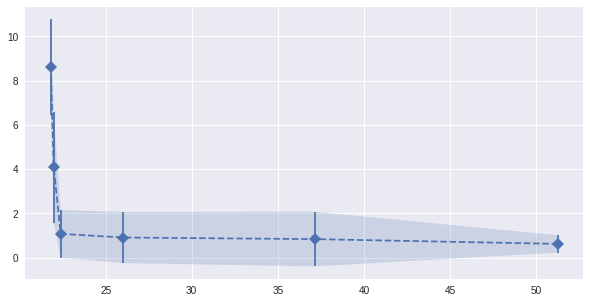

In [71]:
plt.style.use('seaborn')
plt.figure(figsize=(10,5))
plt.errorbar(100-100*np.array(XEr), 100*np.array(GenE),yerr=100*np.array(GenSTD),barsabove=True,fmt='-o', markersize=8,marker='D', linestyle='--')
plt.fill_between(100-100*np.array(XEr), 100*np.array(GenE)-100*np.array(GenSTD), 100*np.array(GenE)+100*np.array(GenSTD),alpha=0.2)
plt.savefig('empirical_rdt_new.pdf')

In [88]:
100-100*np.array(XEr)

array([48.83901576, 31.41198556, 26.5928189 , 23.32188686, 21.82078759,
       21.52512527])

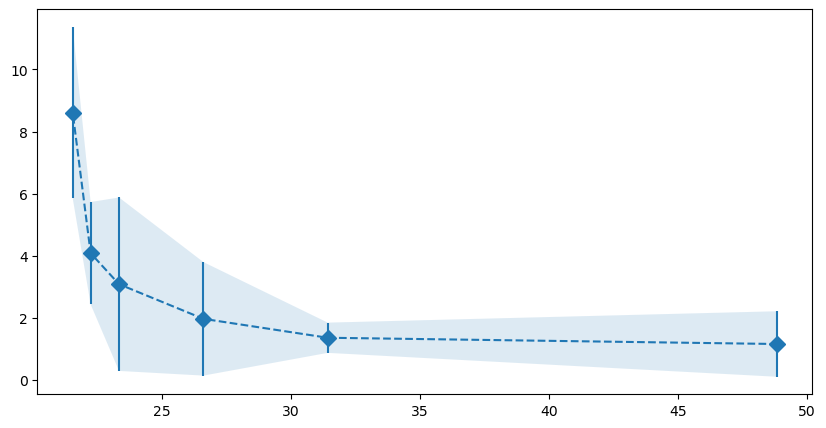

In [99]:
plt.style.use('default')
plt.figure(figsize=(10,5))
plt.errorbar(100-100*np.array(XEr), 100*np.array(GenE),yerr=100*np.array(GenSTD),barsabove=True,fmt='-o', markersize=8,marker='D', linestyle='--')
plt.fill_between(100-100*np.array(XEr), 100*np.array(GenE)-100*np.array(GenSTD), 100*np.array(GenE)+100*np.array(GenSTD),alpha=0.15)
plt.savefig('empirical_rdt.pdf')